In [1]:
#Travail de session

#Travail présenté à : 

#Dans le cadre du cours : 

#Introduction à Python pour les sciences de données 

#TECH30724.H2023-HS 
  
#Par:  

#Alla Iakymenko – 11308140 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.metrics import roc_curve, roc_auc_score
Airbnb = pd.read_csv("./fichiers/Airbnb.csv", sep = ",")
Airbnb.head()

,ID,Nom,ID proprio,Nom proprio,Arrondissement,Quartier,Latitude,Longitude,Type,Prix,Minimum nuits,Nombre avis,Dernier avis,Avis par mois,Affichages proprio,Jours disponibles annuel
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1.0,9,2021-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1.0,45,2022-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3.0,0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1.0,270,2022-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10.0,9,2021-11-19,0.10,1.0,0.0


In [3]:
# Airbnb = Airbnb[(Airbnb["Prix"]< 400) & (Airbnb["Prix"]>0)]

In [4]:
Airbnb["Prix"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: Prix, dtype: float64

In [5]:
Airbnb["Prix"].value_counts().sort_values()

338        1
990        1
2850       1
1497       1
616        1
        ... 
200     1401
60      1458
50      1534
150     2047
100     2051
Name: Prix, Length: 674, dtype: int64

In [6]:
Airbnb.dtypes

ID                            int64
Nom                          object
ID proprio                    int64
Nom proprio                  object
Arrondissement               object
Quartier                     object
Latitude                    float64
Longitude                   float64
Type                         object
Prix                          int64
Minimum nuits               float64
Nombre avis                   int64
Dernier avis                 object
Avis par mois               float64
Affichages proprio          float64
Jours disponibles annuel    float64
dtype: object

In [7]:
Airbnb["Type"].value_counts()

Entire home/apt    24899
Private room       21905
Shared room         1146
Name: Type, dtype: int64

In [8]:
Airbnb["Arrondissement"].value_counts()

Manhattan        21449
Brooklyn         19882
Queens            5583
Bronx             1079
Staten Island      366
Name: Arrondissement, dtype: int64

In [9]:
Airbnb.isna().sum()

ID                              0
Nom                            16
ID proprio                      0
Nom proprio                    21
Arrondissement                536
Quartier                      407
Latitude                      426
Longitude                     538
Type                          945
Prix                            0
Minimum nuits                 217
Nombre avis                     0
Dernier avis                10052
Avis par mois               10052
Affichages proprio            873
Jours disponibles annuel       74
dtype: int64

In [10]:
Airbnb["ID"].value_counts().count()

48895

In [11]:
Airbnb.groupby("Arrondissement")["Prix"].mean()

Arrondissement
Bronx             87.381835
Brooklyn         124.445579
Manhattan        196.552660
Queens            99.691922
Staten Island    114.953552
Name: Prix, dtype: float64

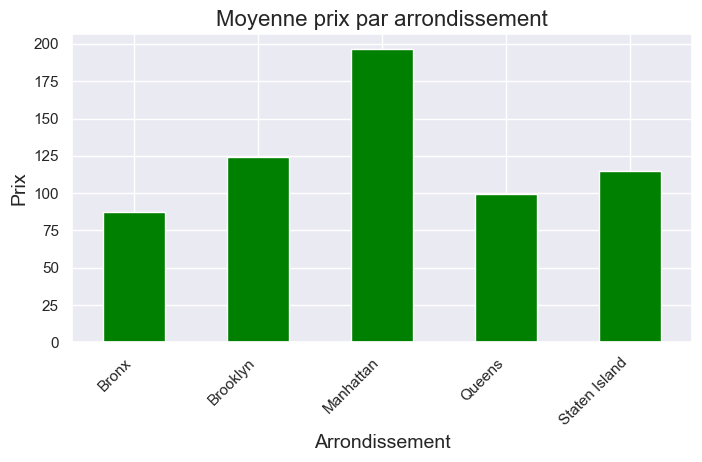

In [12]:
prix_par_arrondissement = Airbnb.groupby("Arrondissement")["Prix"].mean()

fig, ax = plt.subplots(figsize = (8,4))

# Création des graphiques
prix_par_arrondissement. plot.bar(color = "green",ax = ax)

# Modification des titres d'axes
taille_titre_axe = 14
ax.set_xlabel("Arrondissement", fontsize = taille_titre_axe)
ax.set_ylabel("Prix", fontsize = taille_titre_axe)

# Modification des titres de graphiques
taille_titre = 16
ax.set_title("Moyenne prix par arrondissement", fontsize = taille_titre);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,  horizontalalignment = "right")
fig.savefig("Moyenne prix par arrondissement.jpeg", dpi=300)


In [13]:
prix_par_type = Airbnb.pivot_table("Prix", index = "Type",columns = "Arrondissement", aggfunc = "mean")
prix_par_type

Arrondissement,Bronx,Brooklyn,Manhattan,Queens,Staten Island
Type,,,,,
Entire home/apt,128.054496,178.570147,248.540258,147.412894,177.077381
Private room,65.411672,76.566049,116.982903,71.804181,62.165746
Shared room,60.474576,50.846535,89.758547,70.429319,57.444444


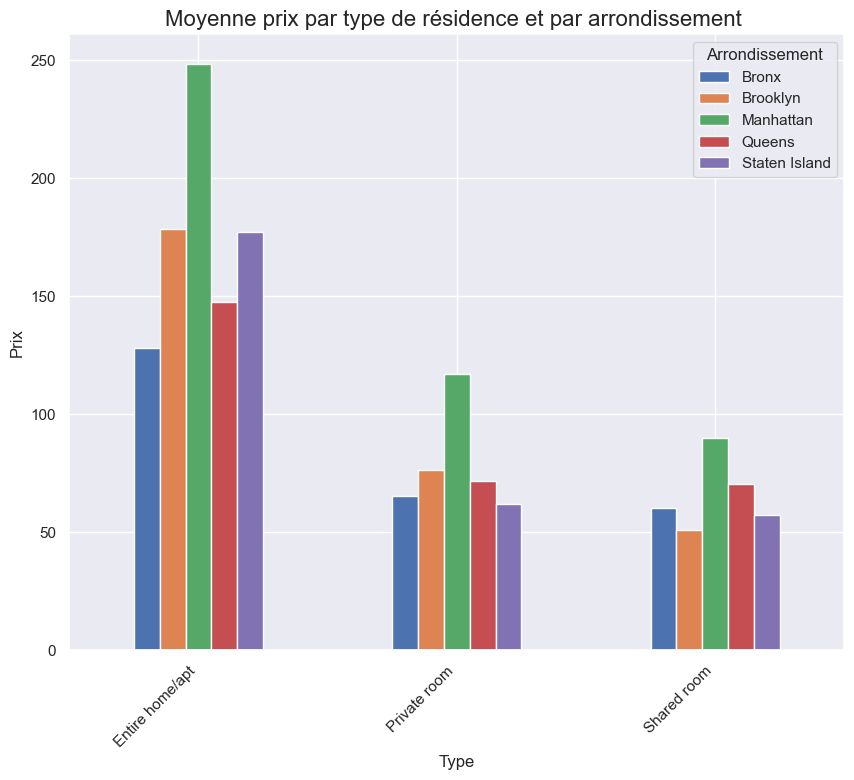

In [14]:
fig, ax = plt.subplots(figsize = (10,8))

# Création des graphiques
prix_par_type.plot.bar(ax = ax)

# Modification des titres d'axes
ax.set_xlabel("Type", fontsize = 12)
ax.set_ylabel("Prix", fontsize = 12);

# Modification des titres de graphiques
ax.set_title("Moyenne prix par type de résidence et par arrondissement ", fontsize = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,  horizontalalignment = "right")
fig.savefig("Moyenne prix par type de résidence et par arrondissement.png")

In [15]:
Airbnb.loc[Airbnb["Nombre avis"]< 100, "Catégorie"] = "Catégorie 1"
Airbnb.loc[(Airbnb["Nombre avis"]>= 100) & (Airbnb["Nombre avis"]<=200), "Catégorie"] = "Catégorie 2"
Airbnb.loc[Airbnb["Nombre avis"]> 200, "Catégorie"] = "Catégorie 3"

In [16]:
#Prix_par_Categorie = Airbnb.pivot_table(values = "Prix", index = "Arrondissement", columns = "Catégorie", aggfunc = "mean")
#Prix_par_Categorie

In [17]:
Prix_par_Categorie = Airbnb.pivot_table(values = "Prix", index = "Catégorie", columns = "Arrondissement", aggfunc = "mean")
Prix_par_Categorie

Arrondissement,Bronx,Brooklyn,Manhattan,Queens,Staten Island
Catégorie,,,,,
Catégorie 1,88.558416,124.660164,199.498220,100.718918,117.776119
Catégorie 2,70.821429,122.296610,152.611282,89.548148,86.321429
Catégorie 3,67.307692,118.007576,128.504065,73.811881,67.000000


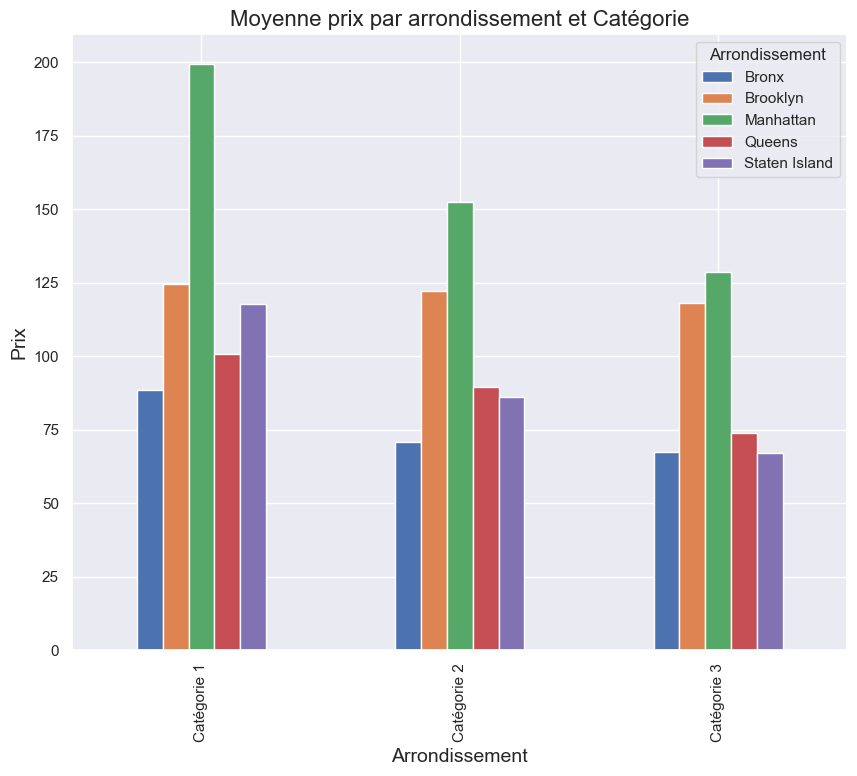

In [18]:
fig, ax = plt.subplots(figsize = (10,8))

# sns.countplot(x = "Prix", data = Airbnb, ax = ax)
# ax.set_xlabel("Prix", fontsize = 10)
# ax.set_ylabel("Type", fontsize = 10);
Prix_par_Categorie.plot.bar(ax = ax)

# Le retour de l'objet d'axes permet d'appliquer les méthodes de matplotlib
ax.set_xlabel("Arrondissement", fontsize = 14)
ax.set_ylabel("Prix", fontsize = 14);

# Modification des titres de graphiques
ax.set_title("Moyenne prix par arrondissement et Catégorie", fontsize = 16)
fig.savefig("Moyenne prix par arrondissement et Catégorie.jpeg")

In [19]:
Airbnb.loc[Airbnb["Nombre avis"]< 100, "Catégorie"] = "Catégorie 1"
Airbnb.loc[(Airbnb["Nombre avis"]>= 100) & (Airbnb["Nombre avis"]<=200), "Catégorie"] = "Catégorie 2"
Airbnb.loc[Airbnb["Nombre avis"]> 200, "Catégorie"] = "Catégorie 3"

In [20]:
Prix_par_Cetégorie = Airbnb.groupby("Catégorie")["Prix"].mean()
Prix_par_Cetégorie

Catégorie
Catégorie 1    154.480600
Catégorie 2    129.522208
Catégorie 3    113.651969
Name: Prix, dtype: float64

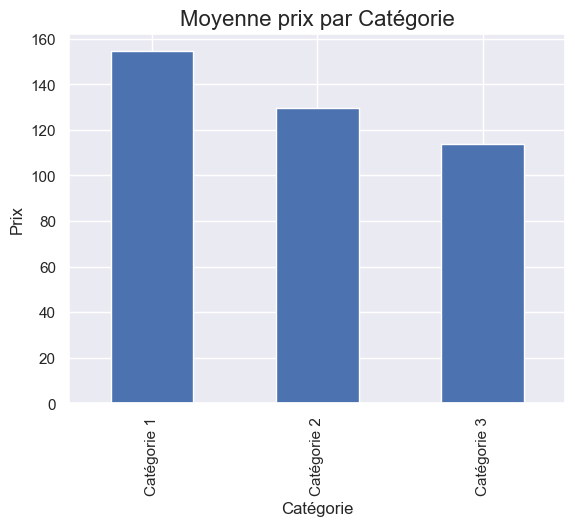

In [21]:
fig, ax = plt.subplots()

# sns.countplot(x = "Prix", data = Airbnb, ax = ax)
# ax.set_xlabel("Prix", fontsize = 10)
# ax.set_ylabel("Type", fontsize = 10);
Prix_par_Cetégorie.plot.bar(ax = ax)

# Le retour de l'objet d'axes permet d'appliquer les méthodes de matplotlib
ax.set_xlabel("Catégorie", fontsize = 12)
ax.set_ylabel("Prix", fontsize = 12);

# Modification des titres de graphiques
ax.set_title("Moyenne prix par Catégorie", fontsize = 16)
fig.savefig("Moyenne prix et Catégorie.jpeg")

In [22]:
Airbnb["Prix"].max()

10000

In [23]:
Airbnb.loc[Airbnb["Prix"]< 100, "Prix_catégorie"] = "Prix 1"
Airbnb.loc[(Airbnb["Prix"]>= 100) & (Airbnb["Prix"]<=200), "Prix_catégorie"] = "Prix 2"
Airbnb.loc[Airbnb["Prix"]> 200, "Prix_catégorie"] = "Prix 3"
Airbnb.head()

,ID,Nom,ID proprio,Nom proprio,Arrondissement,Quartier,Latitude,Longitude,Type,Prix,Minimum nuits,Nombre avis,Dernier avis,Avis par mois,Affichages proprio,Jours disponibles annuel,Catégorie,Prix_catégorie
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1.0,9,2021-10-19,0.21,6.0,365.0,Catégorie 1,Prix 2
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1.0,45,2022-05-21,0.38,2.0,355.0,Catégorie 1,Prix 3
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3.0,0,NaN,NaN,1.0,365.0,Catégorie 1,Prix 2
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1.0,270,2022-07-05,4.64,1.0,194.0,Catégorie 3,Prix 1
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10.0,9,2021-11-19,0.10,1.0,0.0,Catégorie 1,Prix 1


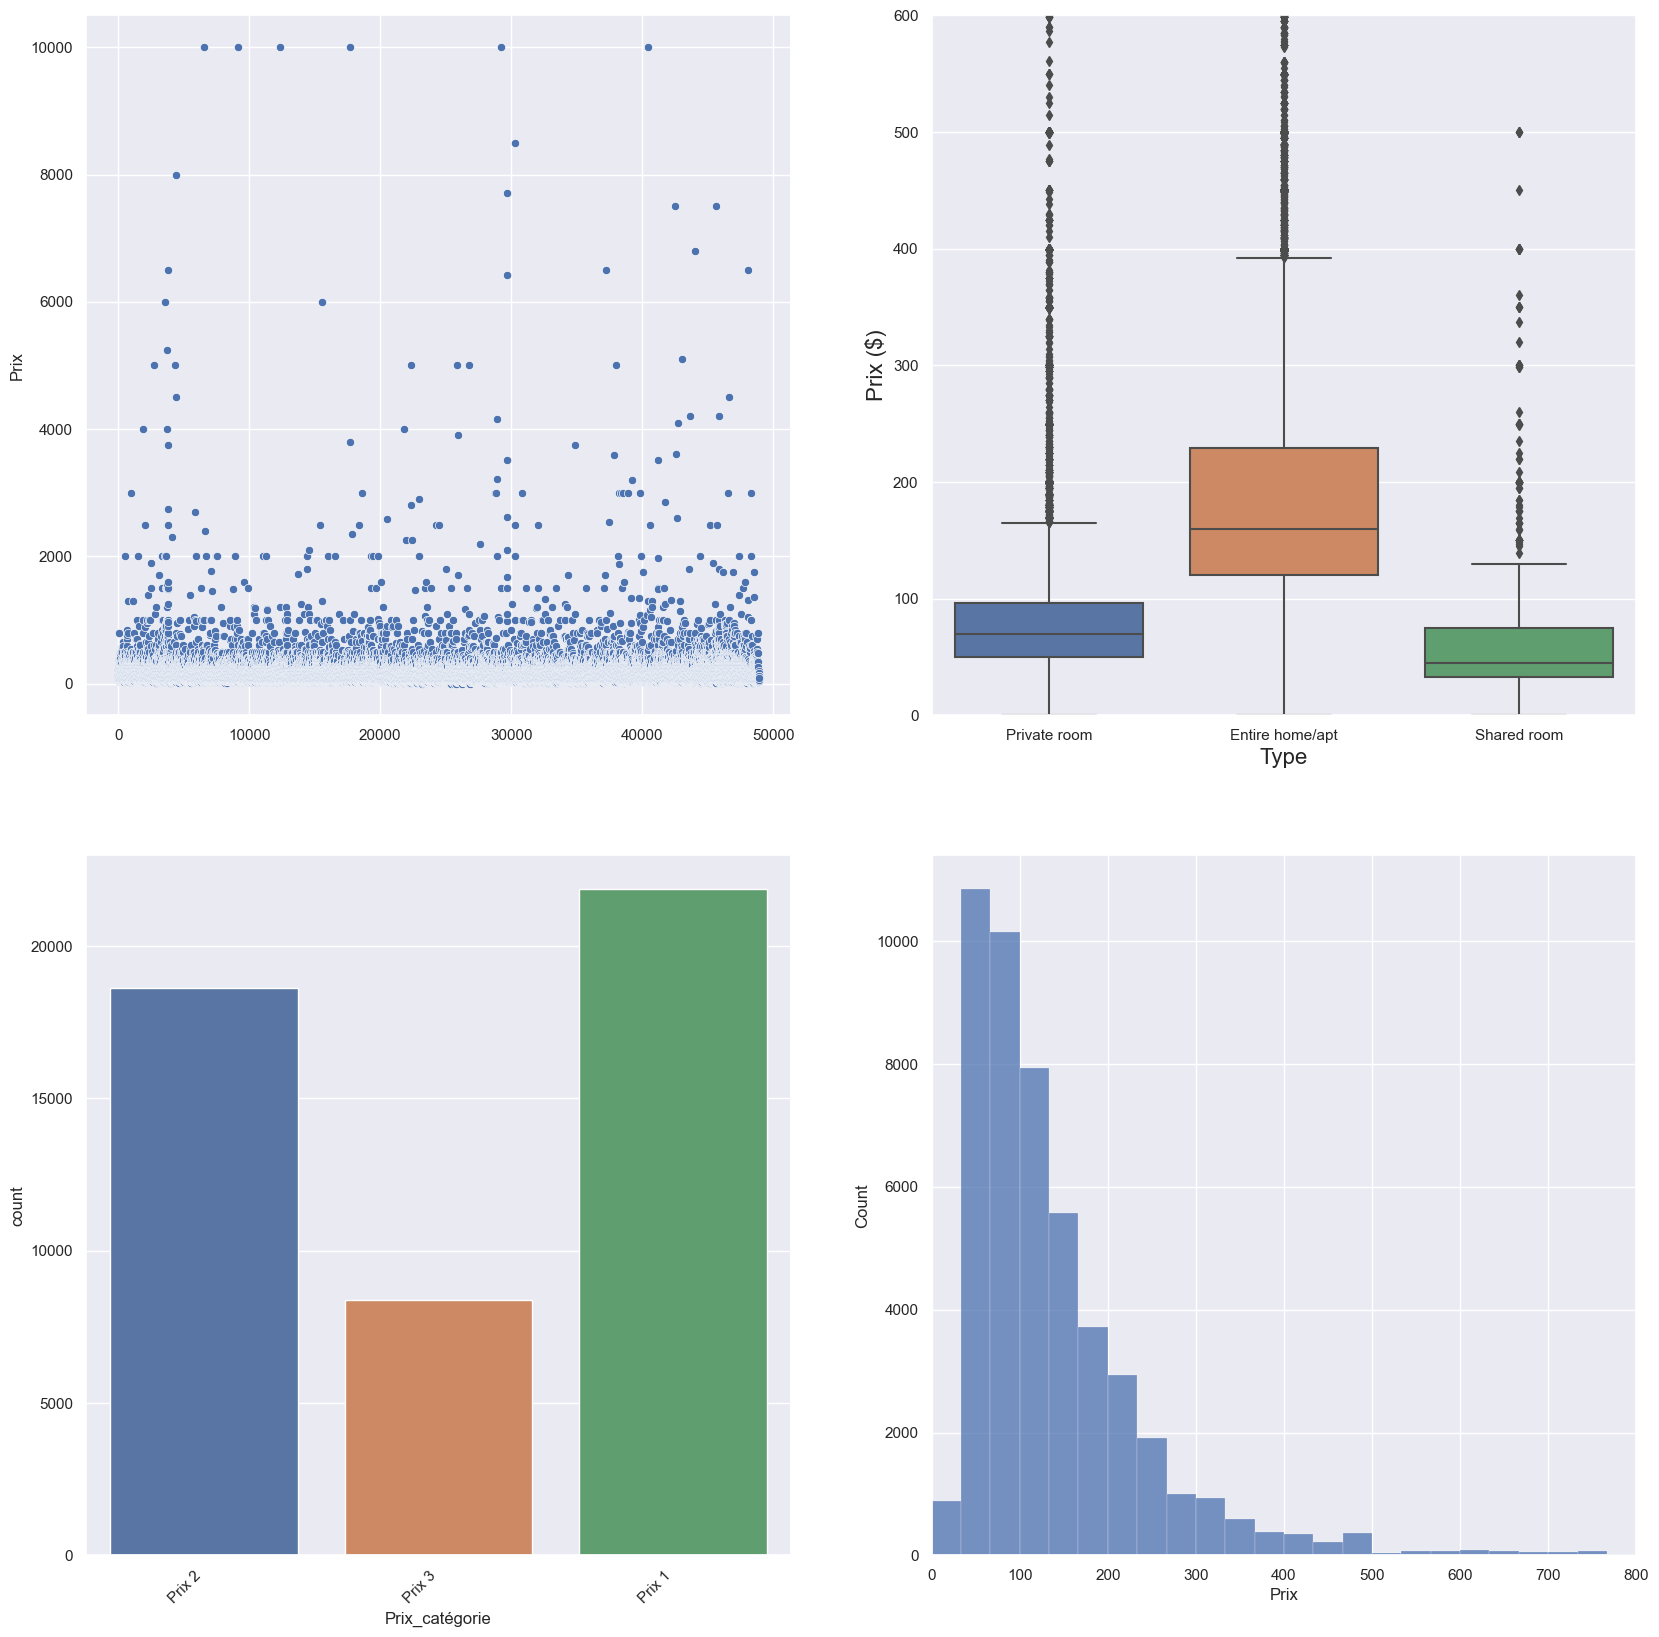

In [24]:
# Créez la figure demandée
fig, ax = plt.subplots(2, 2, figsize = (20,20))
ax1 = ax[0][0]
ax2 = ax[0][1]
ax3 = ax[1][0]
ax4 = ax[1][1]

# # Création des 4 graphiques
sns.scatterplot(x = Airbnb.index, y = "Prix", data = Airbnb, ax = ax1)
sns.boxplot(y = "Prix", x = "Type", data = Airbnb, ax = ax2)
sns.countplot(x ="Prix_catégorie", data = Airbnb, ax = ax3)
sns.histplot(x = "Prix", data = Airbnb, ax = ax4, bins = 300)

# # Modification des titres d'axes
taille_tire = 16
# #ax1.set_xlabel("Airbnb", fontsize = taille_tire)
# #ax1.set_ylabel("Prix ($)", fontsize = taille_tire)
ax2.set_xlabel("Type", fontsize = taille_tire)
ax2.set_ylabel("Prix ($)", fontsize = taille_tire)
# #ax3.set_xlabel("Minimum nuit", fontsize = taille_tire)
# # ax3.set_ylabel("Nombre", fontsize = taille_tire)
# ax4.set_xlabel("Prix ($)", fontsize = 14)
# ax4.set_ylabel("Nombre", fontsize = 14)

# # Modification des traits du troisième graphique. Pour obtenir plus d'information, se référer au chapitre complémentaire 
# ax1.set_ylim(50, 10000)
# ax4.set_xlim(0, 1000)
ax2.set_ylim(0, 600);
ax4.set_xlim(0, 800)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45,  horizontalalignment = "right");

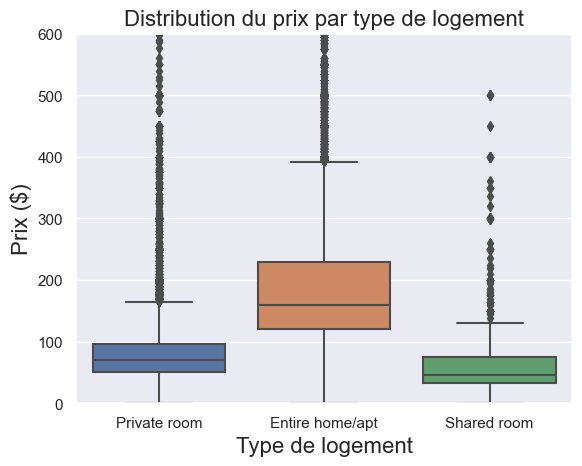

In [25]:
fig, ax = plt.subplots()
sns.boxplot(y = "Prix", x = "Type", data = Airbnb, ax = ax)
ax.set_ylim(0, 600)
taille_tire = 16
ax.set_xlabel("Type de logement", fontsize = taille_tire)
ax.set_ylabel("Prix ($)", fontsize = taille_tire)
# Modification des titres de graphiques
ax.set_title("Distribution du prix par type de logement", fontsize = 16)
fig.savefig("Distribution du prix par type de logement.jpeg")

In [26]:
Airbnb.groupby("Type")["Prix"].describe()

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Entire home/apt,24899.0,211.785654,285.109908,0.0,120.0,160.0,229.0,10000.0
Private room,21905.0,89.816115,160.938196,0.0,50.0,70.0,96.0,10000.0
Shared room,1146.0,70.412740,102.287205,0.0,33.0,45.0,75.0,1800.0


In [27]:
Airbnb.groupby("Type")["Prix"].describe()

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Entire home/apt,24899.0,211.785654,285.109908,0.0,120.0,160.0,229.0,10000.0
Private room,21905.0,89.816115,160.938196,0.0,50.0,70.0,96.0,10000.0
Shared room,1146.0,70.412740,102.287205,0.0,33.0,45.0,75.0,1800.0


In [28]:
Prix_1 = Airbnb[Airbnb["Prix_catégorie"] == "Prix 1"]
Prix_2 = Airbnb[Airbnb["Prix_catégorie"] == "Prix 2"]
Prix_3 = Airbnb[Airbnb["Prix_catégorie"] == "Prix 3"]

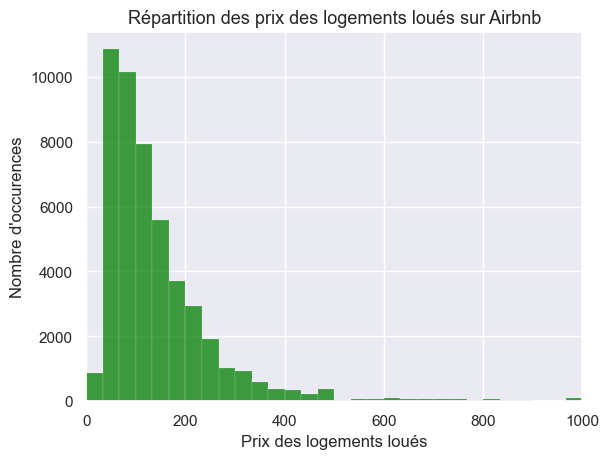

In [29]:
#histogramme 
fig, ax = plt.subplots()
sns.histplot(x = "Prix", data = Airbnb, ax = ax, bins = 300, color = "green")
ax.set_xlim(0, 1000)
taille_titre = 13
ax.set_title("Répartition des prix des logements loués sur Airbnb", fontsize = taille_titre)
taille_titre_axe = 14
ax.set_xlabel("Prix des logements loués")
ax.set_ylabel("Nombre d'occurences")
ax.ticklabel_format(style = "plain")
fig.savefig("Répartition des prix des logements loués sur Airbnb.jpeg")

In [30]:
Airbnb["Prix"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: Prix, dtype: float64

In [31]:
Prix_catégorie= Airbnb.pivot_table(values = "Prix", columns = "Prix_catégorie",index = "Arrondissement", aggfunc = "count")

In [32]:
Prix_catégorie

Prix_catégorie,Prix 1,Prix 2,Prix 3
Arrondissement,,,
Bronx,812,223,44
Brooklyn,10787,7061,2034
Manhattan,5984,9594,5871
Queens,3804,1461,318
Staten Island,246,95,25


In [33]:
repartitions_Prix_catégorie = Prix_catégorie.div(Prix_catégorie.sum(axis = 0))
repartitions_Prix_catégorie

Prix_catégorie,Prix 1,Prix 2,Prix 3
Arrondissement,,,
Bronx,0.037535,0.012097,0.005306
Brooklyn,0.498636,0.383042,0.245297
Manhattan,0.276614,0.520451,0.708032
Queens,0.175842,0.079256,0.038350
Staten Island,0.011372,0.005154,0.003015


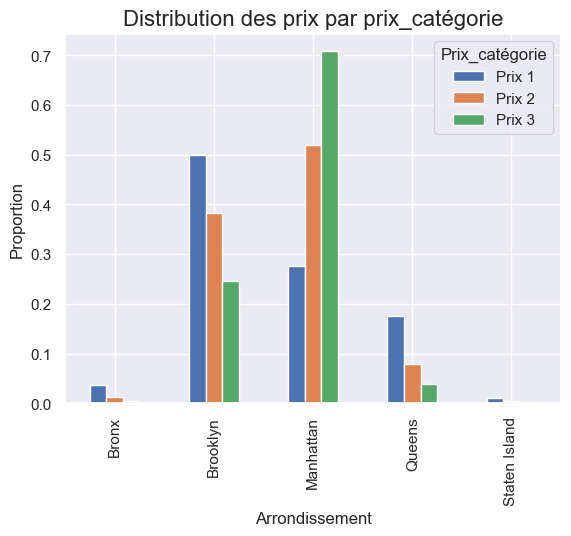

In [34]:
#on vois que Manhattan est le plus cher, Bronx est le  moin cher en propotion
fig, ax = plt.subplots()

repartitions_Prix_catégorie.plot.bar(ax = ax)
# Modification des titres de graphiques
ax.set_title("Distribution des prix par prix_catégorie", fontsize = 16)
fig.savefig("Distribution des prix par prix_catégorie.jpeg")
# Le retour de l'objet d'axes permet d'appliquer les méthodes de matplotlib
ax.set_xlabel("Arrondissement", fontsize = 12)
ax.set_ylabel("Proportion", fontsize = 12);

In [35]:
#partie2

In [36]:
#Certaines habitations sont mises en location plus d'une fois, mais cela est très rare.
Airbnb2 = Airbnb[["Latitude","Longitude"]]
Airbnb2[Airbnb2.duplicated(keep = False)].dropna()

,Latitude,Longitude
2311,40.71353,-73.96216
2575,40.74913,-73.99575
3615,40.77874,-73.98437
7794,40.72741,-74.00178
8494,40.71145,-73.95302
9391,40.74882,-73.97788
9561,40.68398,-73.94101
10947,40.72607,-74.00166
11314,40.77874,-73.98437
11913,40.72347,-73.99302


In [37]:
X = Airbnb.drop(["ID", "Nom", "ID proprio", "Nom proprio", "Quartier", "Prix", "Nombre avis", "Dernier avis", "Avis par mois", "Prix_catégorie", "Catégorie"], axis = 1)
y = Airbnb["Prix"]

variables_num = list(X.select_dtypes(exclude = ['object']))
variables_num

variables_cat = list(X.select_dtypes(include = ['object']))
variables_cat

['Arrondissement', 'Type']

In [38]:
# On sépare temporairement les données en entraînement et en test.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 1
    )

# On redivise X_train pour conserver des données d'entraînement et créer un ensemble de validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size = 0.25, random_state = 1
    )

X_train_num = X_train[variables_num]
X_train_cat = X_train[variables_cat]

X_val_num = X_val[variables_num]
X_val_cat = X_val[variables_cat]

X_test_num = X_test[variables_num]
X_test_cat = X_test[variables_cat]

In [39]:
#On garde en mémoire les indexes des entrées avec au moins une valeur manquante (préparation modèle 3)
indexes_train_drop = X_train.drop(X_train.dropna().index, axis = 0).index
indexes_val_drop = X_val.drop(X_val.dropna().index, axis = 0).index
indexes_test_drop = X_test.drop(X_test.dropna().index, axis = 0).index

In [40]:
#Imputation
index_train = X_train.index
index_val = X_val.index
index_test = X_test.index

# On trouve la médiane de chaque colonne numérique
imp_num = SimpleImputer(strategy = "median").fit(X_train_num)

# On applique la médiane à chaque valeur manquante des trois échantillons
X_train_num = imp_num.transform(X_train_num)
X_val_num = imp_num.transform(X_val_num)
X_test_num = imp_num.transform(X_test_num)

# On convertit les arrays obtenus en dataframe en reprenant les mêmes noms de colonnes
X_train_num = pd.DataFrame(X_train_num, columns = variables_num, index = index_train)
X_val_num = pd.DataFrame(X_val_num, columns = variables_num, index = index_val)
X_test_num = pd.DataFrame(X_test_num, columns = variables_num, index = index_test)

# Remplacez les données catégorielles manquantes
# On trouve la médiane de chaque colonne numérique
imp_cat = SimpleImputer(strategy = "most_frequent").fit(X_train_cat)

# On applique la médiane à chaque valeur manquante des trois échantillons
X_train_cat = imp_cat.transform(X_train_cat)
X_val_cat = imp_cat.transform(X_val_cat)
X_test_cat = imp_cat.transform(X_test_cat)

# On convertit les arrays obtenus en dataframe en reprenant les mêmes noms de colonnes
X_train_cat = pd.DataFrame(X_train_cat, columns = variables_cat, index = index_train)
X_val_cat = pd.DataFrame(X_val_cat, columns = variables_cat, index = index_val)
X_test_cat = pd.DataFrame(X_test_cat, columns = variables_cat, index = index_test)

X_train = pd.concat([X_train_num, X_train_cat], axis = 1)
X_val = pd.concat([X_val_num, X_val_cat], axis = 1)
X_test = pd.concat([X_test_num, X_test_cat], axis = 1)

In [41]:
#Encodage
# Encodez les variables catégorielles à l'aide de ColumnTransformer
columnTransformer = ColumnTransformer(
    transformers = [('encoder', OneHotEncoder(drop = "first"), variables_cat)],
    remainder = "passthrough"
)

X_train = pd.DataFrame(
    columnTransformer.fit_transform(X_train),
    columns = columnTransformer.get_feature_names_out(),
    index = index_train
)

X_val = pd.DataFrame(
    columnTransformer.transform(X_val),
    columns = columnTransformer.get_feature_names_out(),
    index = index_val
)

X_test = pd.DataFrame(
    columnTransformer.transform(X_test),
    columns = columnTransformer.get_feature_names_out(),
    index = index_test
)

# On conserve le nom des colonnes après l'encodage
colonnes_apres_encodage = X_train.columns

In [42]:
#Copie des groupes pour éviter la standardisation dans le modèle le plus simple (préparation modèle 3)

X_train_copy = X_train.copy()
X_val_copy = X_val.copy()
X_test_copy = X_test.copy()

In [43]:
# Calibration de la standardisation sur l'ensemble d'entraînement
transformer = RobustScaler().fit(X_train)

# Application tous les échantillons
X_train = transformer.transform(X_train)
X_val = transformer.transform(X_val)
X_test = transformer.transform(X_test)

# Conversion en dataframe
X_train = pd.DataFrame(X_train, columns = colonnes_apres_encodage, index = index_train)
X_val = pd.DataFrame(X_val, columns = colonnes_apres_encodage, index = index_val)
X_test = pd.DataFrame(X_test, columns = colonnes_apres_encodage, index = index_test)

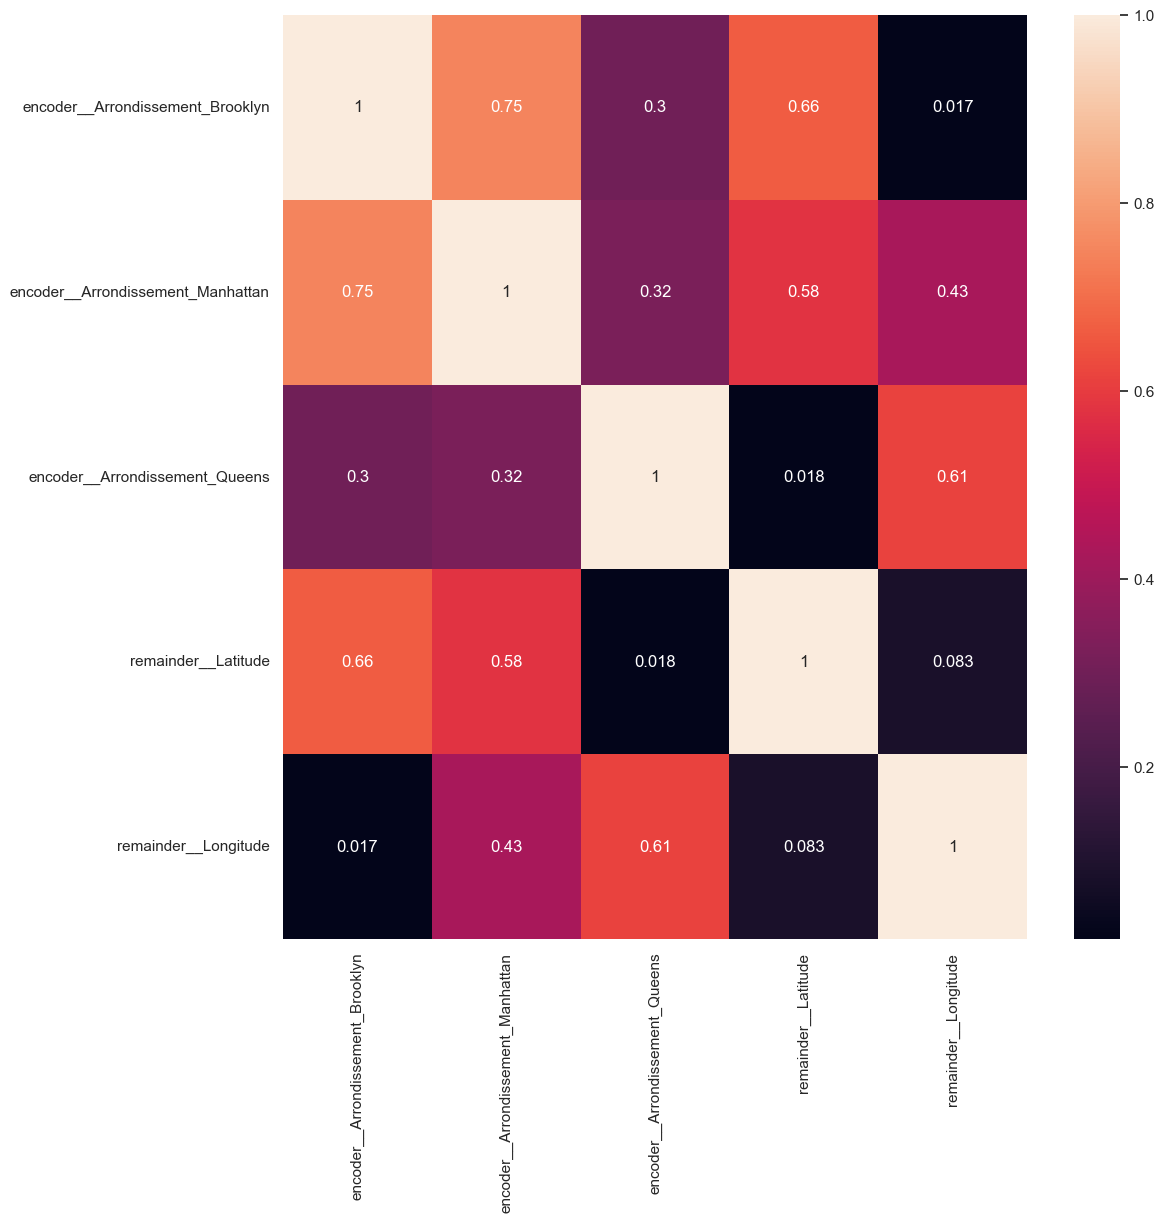

In [44]:
train = pd.concat([X_train, y_train], axis = 1)
corr_matrix = train.corr().abs()

# Pour faciliter la lecture, on commence par rendre nulle la diagonale de la matrice qui vaut toujours 1 sinon
for col in corr_matrix:
    corr_matrix.at[col, col] = 0
    
# On identifie les colonnes des variables explicatives avec corrélation élevée
colonnes_correlees = [column for column in corr_matrix.columns if any(corr_matrix[column] > 0.6)]
corr_matrix2 = train[colonnes_correlees].corr().abs()

fig, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(corr_matrix2, annot = True);

In [45]:
corr_matrix3 = train[colonnes_correlees + ["Prix"]].corr().abs()
print(corr_matrix3["Prix"].sort_values(ascending=False))

Prix                                 1.000000
encoder__Arrondissement_Manhattan    0.157692
remainder__Longitude                 0.146285
encoder__Arrondissement_Brooklyn     0.094627
encoder__Arrondissement_Queens       0.078308
remainder__Latitude                  0.032439
Name: Prix, dtype: float64


In [46]:
colonees_correlees_a_supprimer = [
    "encoder__Arrondissement_Queens",
    "remainder__Latitude"
]

X_train_corr = X_train.drop(colonees_correlees_a_supprimer, axis = 1)
X_val_corr = X_val.drop(colonees_correlees_a_supprimer, axis = 1)
X_test_corr = X_test.drop(colonees_correlees_a_supprimer, axis = 1)

#Pour le modèle 3, on enlève une ligne du moment qu'il y a une valeur manquante

X_train_drop = X_train_copy.drop(indexes_train_drop, axis = 0)
X_val_drop = X_val_copy.drop(indexes_val_drop, axis = 0)
X_test_drop = X_test_copy.drop(indexes_test_drop, axis = 0)
y_train_drop = y_train.drop(indexes_train_drop, axis = 0)
y_val_drop = y_val.drop(indexes_val_drop, axis = 0)
y_test_drop = y_test.drop(indexes_test_drop, axis = 0)

In [47]:
from sklearn.linear_model import LinearRegression

reg_1 = LinearRegression().fit(X_train, y_train)
reg_2 = LinearRegression().fit(X_train_corr, y_train)
reg_3 = LinearRegression().fit(X_train_drop, y_train_drop)

In [48]:
y_pred_1 = reg_1.predict(X_val)
y_pred_2 = reg_2.predict(X_val_corr)
y_pred_3 = reg_3.predict(X_val_drop)

In [49]:
from sklearn.metrics import mean_absolute_error as mae

erreur1 = mae(y_val, y_pred_1)
erreur2 = mae(y_val, y_pred_2)
erreur3 = mae(y_val_drop, y_pred_3)
print(erreur1)
print(erreur2)
print(erreur3)

73.63418199102506
73.74248343549058
72.68556691262972


In [50]:
y_pred_final = reg_3.predict(X_test_drop)
erreur_finale = mae(y_test_drop, y_pred_final)
print(erreur_finale)

74.31446746535045


In [51]:
resultats = pd.DataFrame({"Vrai prix": y_test_drop, "Prix prédit": y_pred_final})
resultats['Différence relative'] = (resultats["Prix prédit"] - resultats["Vrai prix"]) / resultats["Vrai prix"]

# Affichage standard à 2 décimales
pd.options.display.float_format = '{:.2f}'.format
resultats.head(10)
resultats.sort_values("Différence relative", ascending = False)

,Vrai prix,Prix prédit,Différence relative
25753,0,46.83,inf
21281,12,237.34,18.78
33225,10,170.47,16.05
28242,12,163.09,12.59
31066,10,119.45,10.94
...,...,...,...
29820,38,-18.37,-1.48
39953,35,-17.16,-1.49
32619,33,-20.19,-1.61
48126,25,-19.92,-1.80


In [52]:
resultats.replace([np.inf, -np.inf], np.nan, inplace=True)
resultats.dropna()
resultats.loc[:, 'Différence relative'].mean()

0.3325976515682589